In [1]:
## Requerimientos
## tf.__version__ que sea 2.6.2

# !pip  install transformers==4.5.1 -q

# CUDA
# Cuda compilation tools, release 11.2, V11.2.67
# Build cuda_11.2.r11.2/compiler.29373293_0

In [13]:

import pandas as pd
import numpy as np

import re
    
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from collections import Counter

from sklearn.preprocessing import LabelEncoder


Ubicarse en el lugar donde se tenga la data

In [14]:
cd F:\Maestria\TESIS\

F:\Maestria\TESIS


In [3]:
df= pd.read_csv('./BD_POL/political_social_media.csv', encoding='iso-8859-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [4]:
df.shape

(5000, 21)

In [5]:
# No hay duplicados
df[df.duplicated()]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text


In [6]:
# Solo dos LABELS
df["bias"].nunique()

2

### Conteo de Palabras

In [7]:
# Comparar Class Imabalance
plt.figure(figsize= (8, 8))

sns.displot(df_w['bias'])
#df_w.bias.value_counts().plot(kind='pie', figsize=(5,5))
plt.show()

NameError: name 'df_w' is not defined

<Figure size 576x576 with 0 Axes>

In [54]:
# df_w.sort_values(["count"], ascending=True)

#### HACER LA LIMPIEZA

In [8]:
df_w = df[["bias", "text"]]

In [9]:
df_w['text'] = df_w['text'].str.lower()

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
df_w["text"] = df_w["text"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
df_w.head()

,bias,text
0,partisan,rt @nowthisnews: rep. trey radel (r- #fl) slam...
1,partisan,video - #obamacare: full of higher costs and ...
2,neutral,please join me today in remembering our fallen...
3,neutral,rt @senatorleahy: 1st step toward senate debat...
4,partisan,.@amazon delivery #drones show need to update ...


In [12]:
# Borramos @ # - / : .
df_w['text'] = df_w['text'].str.replace(
    r'[^a-z0-9\s]',
    '',
    regex=True,
    flags=re.IGNORECASE
)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
df_w.head()

,bias,text
0,partisan,rt nowthisnews rep trey radel r fl slams obama...
1,partisan,video obamacare full of higher costs and bro...
2,neutral,please join me today in remembering our fallen...
3,neutral,rt senatorleahy 1st step toward senate debate ...
4,partisan,amazon delivery drones show need to update law...


In [14]:
## Remover los "rt" (retweets) del DS
df_w['text'] = df_w['text'].str.replace(
    r'\bRT\b',
    '',
    regex=True,
    flags=re.IGNORECASE
)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df_w.text[150]

'at the antiochpolice 47th neighborhood cleanup working to keep antioch amp ca9 clean'

In [17]:
# Reemplazo COUNT
df_w['count'] = df_w['text'].apply(lambda x: len(x.split()))

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
## Claramente hay outliers.
df_w.describe()

,count
count,5000.000000
mean,30.927400
std,51.063424
min,0.000000
25%,15.000000
50%,19.000000
75%,32.000000
max,2595.000000


In [19]:
df_w.sort_values(["count"], ascending=True)

,bias,text,count
4917,neutral,,0
432,neutral,,0
4552,neutral,,0
3861,neutral,,0
4231,neutral,,0
...,...,...,...
4511,neutral,todays news from sen bernie sanders ivt va se...,365
4515,neutral,todays news from sen bernie sanders ivt glob...,372
4521,neutral,todays news from sen bernie sanders ivt spyin...,416
4124,neutral,yesterday i introduced legislation to jumpstar...,1044


In [25]:
df_w.drop(df_w[(df_w['count'] < 2)].index, inplace=True)
df_w.drop(df_w[(df_w['count'] > 2000)].index, inplace=True)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df_w.sort_values(["count"], ascending=True)

,bias,text,count
3765,neutral,well said,2
1697,neutral,go dodgers,2
4462,neutral,go frankfort,2
2555,neutral,happy nationalcoffeeday,2
2182,neutral,jeschmitty yes,2
...,...,...,...
2642,partisan,i was very proud to lead a group of my colleag...,362
4511,neutral,todays news from sen bernie sanders ivt va se...,365
4515,neutral,todays news from sen bernie sanders ivt glob...,372
4521,neutral,todays news from sen bernie sanders ivt spyin...,416


In [13]:
# def remove_rt(text):
#     return re.sub(r'\bRT\b', '', text, flags=re.IGNORECASE)

In [14]:
# # Remover STOPWORDS para simplficiar el EDA.
# import nltk
# from nltk.corpus import stopwords

# nltk.download('stopwords')

# stop_words = set(stopwords.words('english'))

# def remove_stop_words(text):
#     tokens = nltk.word_tokenize(text)
#     filtered_tokens = [t for t in tokens if t.lower() not in stop_words]
#     return ' '.join(filtered_tokens)

In [27]:
# Remover STOPWORDS para simplficiar el EDA.
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

def remove_stop_words(text):
    doc = nlp(text)
    return ' '.join([t.text for t in doc if not t.is_stop])

# Assuming 'text_column' is the column you want to clean
df_w['text_clean'] = df_w['text'].apply(remove_stop_words)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df_w['text_clean'] = df_w['text'].apply(remove_stop_words)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
# ## For para ver si funcionan las stopwrods removal
# n = 0
# for i,p in zip(df_w.text,df_w.text_clean):
#     x = len(i)
#     y = len(p)
#     if x != y:
# #         print(x)
# #         print(y)   
#         print("Si")
# #     n += 1
# #     print(n)

# # df_w['text_clean']

In [30]:
df_w['tokens'] = df_w['text_clean'].apply(word_tokenize)


C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df_w[['tokens']]

,tokens
0,"[nowthisnews, rep, trey, radel, r, fl, slams, ..."
1,"[video, obamacare, higher, costs, broken, prom..."
2,"[join, today, remembering, fallen, heroes, hon..."
3,"[senatorleahy, 1st, step, senate, debate, leah..."
4,"[amazon, delivery, drones, need, update, law, ..."
...,...
4995,"[applaud, governor, perrys, recent, decision, ..."
4996,"[today, voted, favor, hr, 5016, financial, ser..."
4997,"[taken, posted, wokv, interview, congressman, ..."
4998,"[join, week, town, hall, ocala, ill, answer, q..."


In [36]:
# Reemplazo COUNT por COUNT_2 ahora que removí STOPWORDS, y vuelvo a dropear aquellas que tengna menos de 4
df_w['count_2'] = df_w['tokens'].apply(lambda x: len(x))
# df_w.sort_values(["count_2"], ascending=False)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
df_w.describe()

,count,count_2
count,4979.000000,4979.000000
mean,30.535047,17.464149
std,35.970393,19.843078
min,2.000000,1.000000
25%,15.000000,9.000000
50%,19.000000,12.000000
75%,32.000000,18.000000
max,1044.000000,644.000000


In [39]:
df_w.sort_values(["count_2"], ascending=True).head(20)

,bias,text,count,text_clean,tokens,count_2
2800,neutral,always remember,2,remember,[remember],1
2783,neutral,go niners,2,niners,[niners],1
4462,neutral,go frankfort,2,frankfort,[frankfort],1
755,partisan,this is significant,3,significant,[significant],1
4224,partisan,now they tell us,4,tell,[tell],1
3765,neutral,well said,2,said,[said],1
4666,partisan,out of touch,3,touch,[touch],1
1697,neutral,go dodgers,2,dodgers,[dodgers],1
4924,neutral,listen now,2,listen,[listen],1
4662,neutral,this is about babies,4,babies,[babies],1


In [40]:
df_w.drop(df_w[(df_w['count_2'] < 2)].index, inplace=True)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
df_w.sort_values(["count_2"], ascending=True).head(20)

,bias,text,count,text_clean,tokens,count_2
1023,neutral,my pleasure deciminyan,3,pleasure deciminyan,"[pleasure, deciminyan]",2
692,neutral,the original chickenhawk,3,original chickenhawk,"[original, chickenhawk]",2
1543,neutral,botanical gardens,2,botanical gardens,"[botanical, gardens]",2
680,neutral,thank you stevescalise,3,thank stevescalise,"[thank, stevescalise]",2
4279,neutral,beat the heat,3,beat heat,"[beat, heat]",2
665,neutral,infarmbureau thank you,3,infarmbureau thank,"[infarmbureau, thank]",2
831,partisan,pretty much says it all,5,pretty says,"[pretty, says]",2
2512,neutral,were not going away,4,going away,"[going, away]",2
2607,partisan,another effect of obamacare,4,effect obamacare,"[effect, obamacare]",2
2527,neutral,like and share,3,like share,"[like, share]",2


In [42]:
df_w = df_w.drop(columns=['count'])

In [43]:
query = 'count_2 == 4'

result = df_w.query(query)

result

## NO BOTO LAS DE 4

,bias,text,text_clean,tokens,count_2
14,neutral,skitchp wouldnt wish that on anyone even you s...,skitchp nt wish skitch,"[skitchp, nt, wish, skitch]",4
54,neutral,congrats to the coleg last day of session,congrats coleg day session,"[congrats, coleg, day, session]",4
97,neutral,if you think america succeeds when womensucceed,think america succeeds womensucceed,"[think, america, succeeds, womensucceed]",4
138,neutral,school shootings should not be our nations norm,school shootings nations norm,"[school, shootings, nations, norm]",4
193,neutral,did you know i am on instagram check it out an...,know instagram check follow,"[know, instagram, check, follow]",4
...,...,...,...,...,...
4650,neutral,miss my enewsletter this week sign up here,miss enewsletter week sign,"[miss, enewsletter, week, sign]",4
4733,neutral,visiting with residents at chateau girardeau,visiting residents chateau girardeau,"[visiting, residents, chateau, girardeau]",4
4753,neutral,look who duncan ran in to this morning,look duncan ran morning,"[look, duncan, ran, morning]",4
4914,neutral,happy hispanic heritage month,happy hispanic heritage month,"[happy, hispanic, heritage, month]",4


In [44]:
# Revisamos el count
df_w.sort_values(["count_2"], ascending=False)

,bias,text,text_clean,tokens,count_2
4124,neutral,yesterday i introduced legislation to jumpstar...,yesterday introduced legislation jumpstart eco...,"[yesterday, introduced, legislation, jumpstart...",644
4521,neutral,todays news from sen bernie sanders ivt spyin...,todays news sen bernie sanders ivt spying am...,"[todays, news, sen, bernie, sanders, ivt, spyi...",242
4511,neutral,todays news from sen bernie sanders ivt va se...,todays news sen bernie sanders ivt va secret...,"[todays, news, sen, bernie, sanders, ivt, va, ...",226
4073,partisan,im proud to join congressman mark sanford in i...,m proud join congressman mark sanford introduc...,"[m, proud, join, congressman, mark, sanford, i...",224
4515,neutral,todays news from sen bernie sanders ivt glob...,todays news sen bernie sanders ivt global w...,"[todays, news, sen, bernie, sanders, ivt, glob...",217
...,...,...,...,...,...
1023,neutral,my pleasure deciminyan,pleasure deciminyan,"[pleasure, deciminyan]",2
2404,neutral,utopiahealth1 my pleasure,utopiahealth1 pleasure,"[utopiahealth1, pleasure]",2
2382,neutral,permacultureme wish i could have made it,permacultureme wish,"[permacultureme, wish]",2
619,neutral,i love the earth,love earth,"[love, earth]",2


In [45]:
newdf_partisan = df_w.copy()
newdf_neutral = df_w.copy()

In [46]:
newdf_neutral

,bias,text,text_clean,tokens,count_2
0,partisan,nowthisnews rep trey radel r fl slams obamaca...,nowthisnews rep trey radel r fl slams obamac...,"[nowthisnews, rep, trey, radel, r, fl, slams, ...",9
1,partisan,video obamacare full of higher costs and bro...,video obamacare higher costs broken promises,"[video, obamacare, higher, costs, broken, prom...",6
2,neutral,please join me today in remembering our fallen...,join today remembering fallen heroes honoring ...,"[join, today, remembering, fallen, heroes, hon...",12
3,neutral,senatorleahy 1st step toward senate debate on...,senatorleahy 1st step senate debate leahycra...,"[senatorleahy, 1st, step, senate, debate, leah...",14
4,partisan,amazon delivery drones show need to update law...,amazon delivery drones need update law promote...,"[amazon, delivery, drones, need, update, law, ...",13
...,...,...,...,...,...
4995,partisan,i applaud governor perrys recent decision to d...,applaud governor perrys recent decision deploy...,"[applaud, governor, perrys, recent, decision, ...",29
4996,partisan,today i voted in favor of hr 5016 financial s...,today voted favor hr 5016 financial services...,"[today, voted, favor, hr, 5016, financial, ser...",74
4997,neutral,taken from posted wokv interview congressman...,taken posted wokv interview congressman yoh...,"[taken, posted, wokv, interview, congressman, ...",31
4998,neutral,join me next week for a town hall in ocala ill...,join week town hall ocala ill answer questions,"[join, week, town, hall, ocala, ill, answer, q...",8


In [47]:
newdf_neutral.drop(newdf_neutral[(newdf_neutral['bias'] == "partisan")].index, inplace=True)
newdf_partisan.drop(newdf_partisan[(newdf_partisan['bias'] == "neutral")].index, inplace=True)

In [48]:
# newdf_neutral.head()

In [49]:
tokens_p = [token for sublist in newdf_partisan['tokens'] for token in sublist]
tokens_p_filtered = [w for w in tokens_p if len(w)>2]

word_freq_p = Counter(tokens_p_filtered)

tokens_n = [token for sublist in newdf_neutral['tokens'] for token in sublist]
tokens_n_filtered = [w for w in tokens_n if len(w)>2]

word_freq_n = Counter(tokens_n_filtered)

In [50]:
# len(tokens_n)

In [51]:
word_p = list(word_freq_p.keys())
count_p = list(word_freq_p.values())

word_n = list(word_freq_n.keys())
count_n = list(word_freq_n.values())

In [52]:
word_count_df_p = pd.DataFrame({"word":word_p, "frequency":count_p})
word_count_df_n = pd.DataFrame({"word":word_n, "frequency":count_n})

In [53]:
word_count_df_n.head()

,word,frequency
0,join,112
1,today,553
2,remembering,6
3,fallen,8
4,heroes,22


In [54]:
word_count_df_p = word_count_df_p.sort_values(["frequency"], ascending=False)
word_count_df_n = word_count_df_n.sort_values(["frequency"], ascending=False)

In [57]:
word_count_df_p.tail(500)

,word,frequency
2893,survivors,1
2894,abuser,1
2851,mainly,1
2850,climb,1
2849,drowning,1
...,...,...
3164,andrea,1
3165,mitchell,1
3166,hagels,1
3167,nomination,1


In [106]:
# Eliminamos palabras con más de 335 veces y con menos de 25.
# word_count_df_1.drop(word_count_df_1[(word_count_df_1['frequency'] >335)].index, inplace=True)

In [58]:
word_count_df_p.drop(word_count_df_p[(word_count_df_p['frequency'] < 20)].index, inplace=True)
word_count_df_n.drop(word_count_df_n[(word_count_df_n['frequency'] < 20)].index, inplace=True)

In [59]:
word_count_df_n.shape

(547, 2)

In [60]:
word_count_df_p.shape

(176, 2)

## Para Partisan

### Al estar los Datasets ordenados de mayor a menor, entonces, los gráficos son más fáciles de leer, los gráficos de arriba representan las palabras más frecuentes.

In [61]:
wc_df_1 = word_count_df_p.iloc[:50]
wc_df_2 = word_count_df_p.iloc[50:100]
wc_df_3 = word_count_df_p.iloc[100:150]
wc_df_4 = word_count_df_p.iloc[150:200]

<AxesSubplot:xlabel='frequency', ylabel='word'>

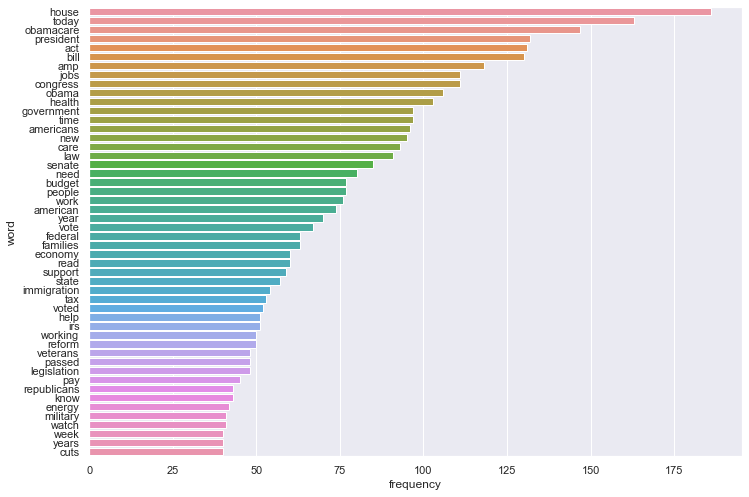

In [62]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(data = wc_df_1, y="word", x="frequency")

<AxesSubplot:xlabel='frequency', ylabel='word'>

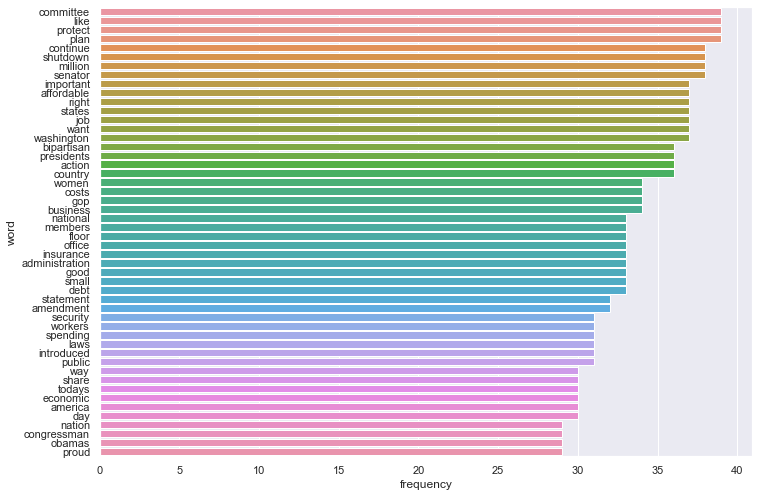

In [63]:
sns.barplot(data = wc_df_2, y="word", x="frequency")

<AxesSubplot:xlabel='frequency', ylabel='word'>

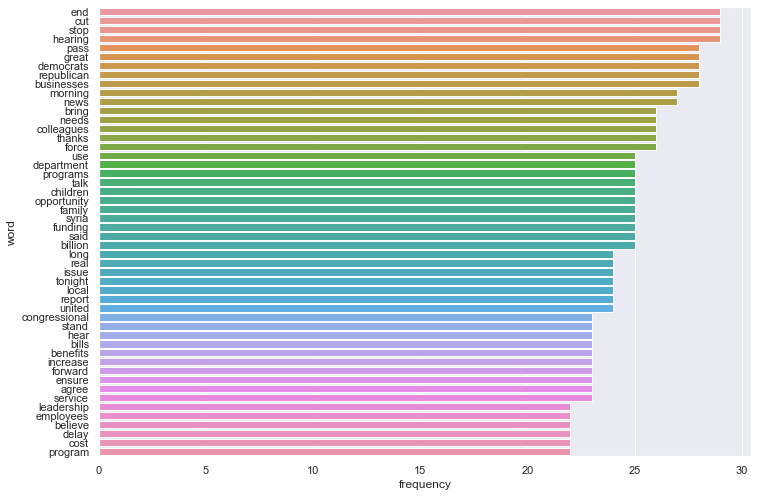

In [64]:
sns.barplot(data = wc_df_3, y="word", x="frequency")

<AxesSubplot:xlabel='frequency', ylabel='word'>

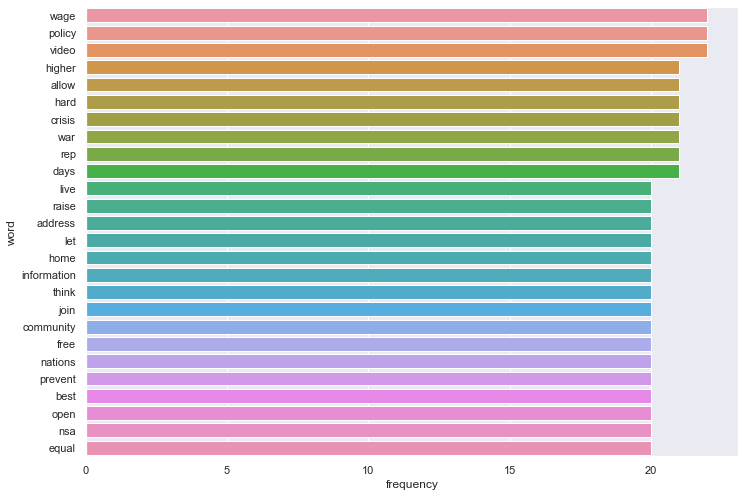

In [65]:
sns.barplot(data = wc_df_4, y="word", x="frequency")

In [66]:
wc_df_11 = word_count_df_n.iloc[:50]
wc_df_22 = word_count_df_n.iloc[50:100]
wc_df_33 = word_count_df_n.iloc[100:150]
wc_df_44 = word_count_df_n.iloc[150:200]
wc_df_55 = word_count_df_n.iloc[200:250]
wc_df_66 = word_count_df_n.iloc[250:]

<AxesSubplot:xlabel='frequency', ylabel='word'>

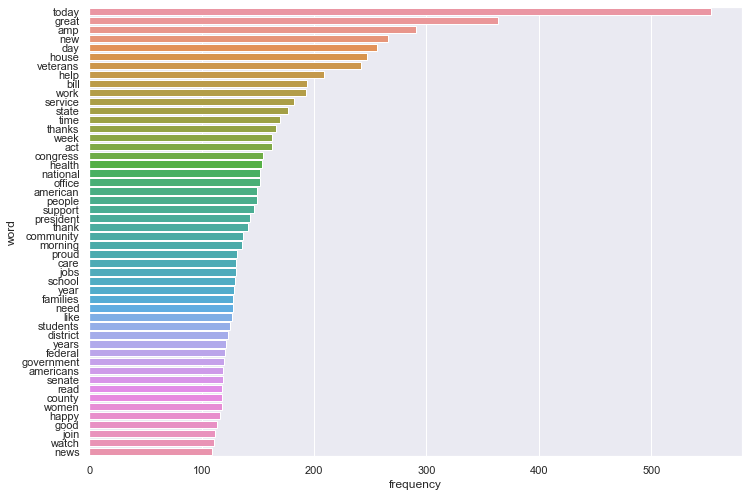

In [67]:
sns.barplot(data = wc_df_11, y="word", x="frequency")

<AxesSubplot:xlabel='frequency', ylabel='word'>

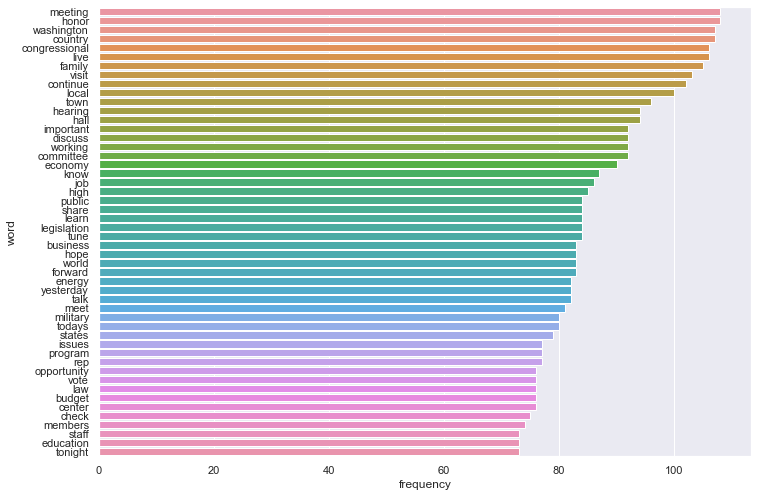

In [68]:
sns.barplot(data = wc_df_22, y="word", x="frequency")

<AxesSubplot:xlabel='frequency', ylabel='word'>

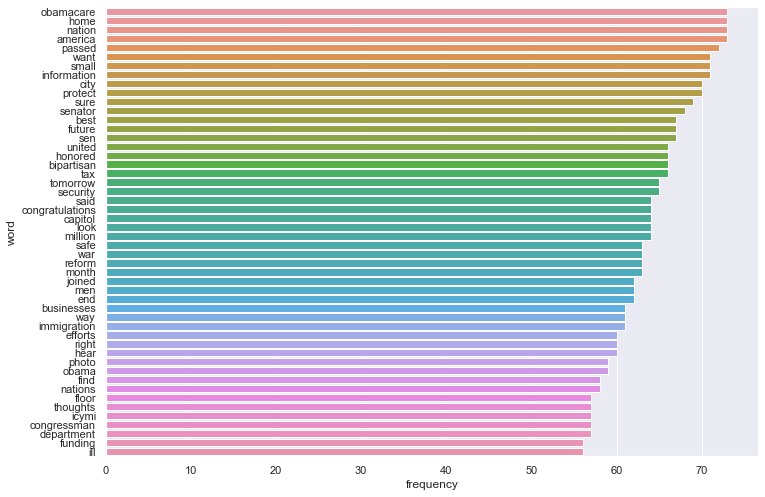

In [69]:
sns.barplot(data = wc_df_33, y="word", x="frequency")

<AxesSubplot:xlabel='frequency', ylabel='word'>

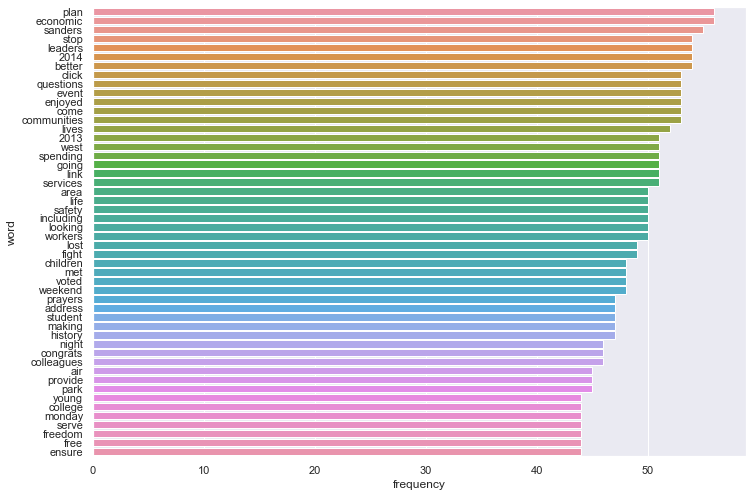

In [70]:
sns.barplot(data = wc_df_44, y="word", x="frequency")

<AxesSubplot:xlabel='frequency', ylabel='word'>

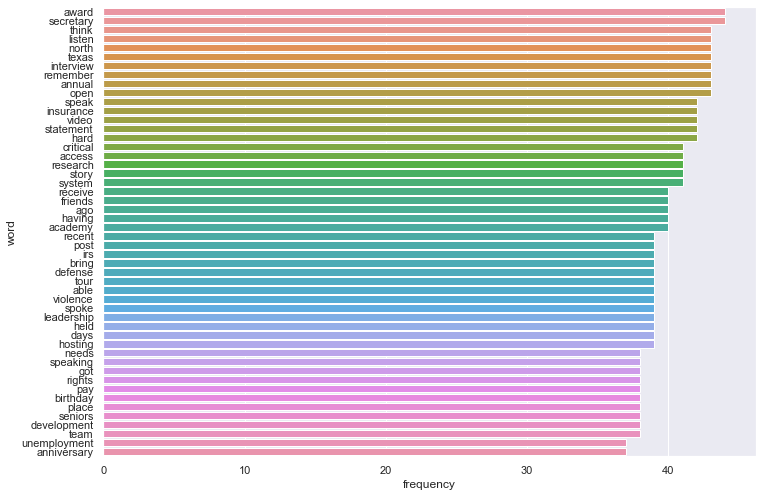

In [71]:
sns.barplot(data = wc_df_55, y="word", x="frequency")

In [122]:
# sns.barplot(data = wc_df_66, y="word", x="frequency")

Partisan: House, president, congress, obamacare, act, bill, law, jobs, health, obama, government, amreicans, senate, care, people, budget, work, american, vote, laws, immigration, federal, economy, state, tax, reform, passed, voted, IRS, republicans, job, energy, military, states, washingotn, affordable, senator, country, bipartisan, office, insurance, administrartion, spending, debt, public, american, economic,


Congress, president, Obama (todo lo relacionado), health, care, laws, senate, government, americans, bidget, laws, immigration, vote, federal, tax, job, economy, todas esas son palabras muy frecuentas en el LABEL PARTISAN.

Algunas palabras como president, american, health, care, government, que ambas clases comparteN, (partisan y neutral) también son frecuentes en el LABEL NEUTRAL, y además se repiten casi o igual de veces que en el LABEL PARTISAN, sin embargo, tenemos que tomar en consideración que el LABEL NEUTRAL es la clase dominante, casi tres veces más que el LABEL PARTISAN.

In [72]:
print(word_count_df_n.shape)
print(word_count_df_p.shape)

(547, 2)
(176, 2)


In [73]:
580/198
# rate Neutral vs Partisan

2.9292929292929295

In [74]:
word_count_df_p

,word,frequency
145,house,186
42,today,163
5,obamacare,147
60,president,132
193,act,131
...,...,...
693,prevent,20
759,best,20
264,open,20
907,nsa,20


In [75]:
# df_joined = word_count_df_p.query('word in @word_count_df_n["word"].values')
df_joined = pd.eval('word_count_df_p[["word", "frequency"]].merge(word_count_df_n[["word", "frequency"]], on="word", suffixes=("_p", "_n"))')

In [76]:
df_joined['frequency_n_divided'] = (df_joined['frequency_n'] /2.9292929292929295).round(0)

In [77]:
df_joined.head(50)

## Se divide el frequency_n entre el ratio de diferencia que hay entre las dos clases.  
# Para tener una mejor visión proporcional entre las dos clases

,word,frequency_p,frequency_n,frequency_n_divided
0,house,186,247,84.0
1,today,163,553,189.0
2,obamacare,147,73,25.0
3,president,132,143,49.0
4,act,131,163,56.0
5,bill,130,194,66.0
6,amp,118,291,99.0
7,jobs,111,131,45.0
8,congress,111,155,53.0
9,obama,106,59,20.0



Obamacare, president, congress, bill, health, law, Obama, government, tax, reform, economy, budget, legislation, immigration, federal, son claramente palabras que tienen más frecuencia en el lado de "PARTISAN", pero también tenemos que tener en cuenta que BERT va a entender el contexto en el que se usan estas palabras, sin embargo, esto depende de la cantidad de data que se tenga y de qué tan diferente es el contexto, igualmente, puede que que el modelo tenga un sesgo a la hora de clasificar los textos cuando encuentre estas palabras, porque de todas formas hay una gran diferencia en la frecuencia en la que aparecen estas palabras en cada CLASE.


<AxesSubplot:xlabel='word'>

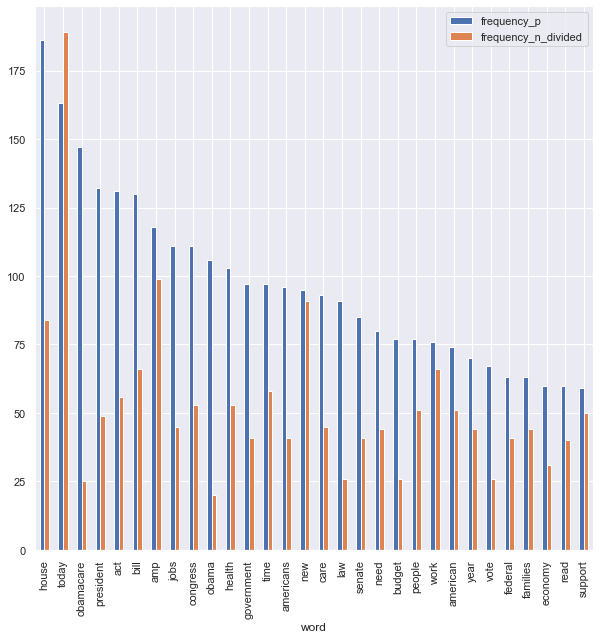

In [78]:
# En el siguiente gráfico podemos ver de forma visual la frecuencia de palabras para cada LABEL. Ordenado por FREQUENCY_P 
df_joined[:30].plot(x="word", y=["frequency_p", "frequency_n_divided"],
        kind="bar", figsize=(10, 10))

<AxesSubplot:xlabel='word'>

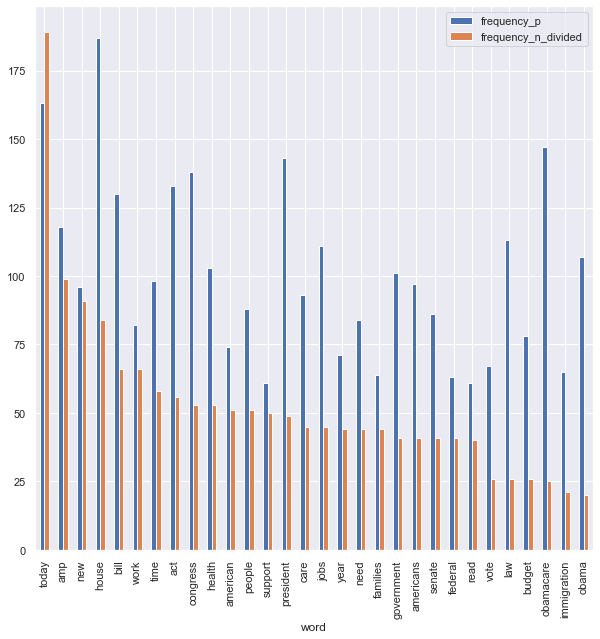

In [130]:
# En el siguiente gráfico podemos ver de forma visual la frecuencia de palabras para cada LABEL. Ordenado por FREQUENCY_N_DIVIDED 
df_joined[:30].sort_values(["frequency_n_divided"], ascending=False).plot(x="word", y=["frequency_p", "frequency_n_divided"],
        kind="bar", figsize=(10, 10))

## Limpieza

In [15]:
## Recordemos que en BERT las stopwords son de utilidad y el stemming reduce la eficiencia
# Sin embargo, lematizar puede ayudar a reducir el ruido del modelo, especialmente ahora que trabajamos con class imbalance y con 
# data de baja calidad

In [16]:
df= pd.read_csv('./BD_POL/political_social_media.csv', encoding='iso-8859-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


#### HACER LA LIMPIEZA

In [17]:
df_w = df[["bias", "text"]]

In [18]:
df_w['text'] = df_w['text'].str.lower()

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df_w["text"] = df_w["text"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
df_w.head()

,bias,text
0,partisan,rt @nowthisnews: rep. trey radel (r- #fl) slam...
1,partisan,video - #obamacare: full of higher costs and ...
2,neutral,please join me today in remembering our fallen...
3,neutral,rt @senatorleahy: 1st step toward senate debat...
4,partisan,.@amazon delivery #drones show need to update ...


In [21]:
# Borramos @ # - / : .
df_w['text'] = df_w['text'].str.replace(
    r'[^a-z0-9\s]',
    '',
    regex=True,
    flags=re.IGNORECASE
)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
df_w.head()

,bias,text
0,partisan,rt nowthisnews rep trey radel r fl slams obama...
1,partisan,video obamacare full of higher costs and bro...
2,neutral,please join me today in remembering our fallen...
3,neutral,rt senatorleahy 1st step toward senate debate ...
4,partisan,amazon delivery drones show need to update law...


In [23]:
## Remover los "rt" (retweets) del DS
df_w['text'] = df_w['text'].str.replace(
    r'\bRT\b',
    '',
    regex=True,
    flags=re.IGNORECASE
)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
df_w

,bias,text
0,partisan,nowthisnews rep trey radel r fl slams obamaca...
1,partisan,video obamacare full of higher costs and bro...
2,neutral,please join me today in remembering our fallen...
3,neutral,senatorleahy 1st step toward senate debate on...
4,partisan,amazon delivery drones show need to update law...
...,...,...
4995,partisan,i applaud governor perrys recent decision to d...
4996,partisan,today i voted in favor of hr 5016 financial s...
4997,neutral,taken from posted wokv interview congressman...
4998,neutral,join me next week for a town hall in ocala ill...


In [25]:
df_w['count'] = df_w['text'].apply(lambda x: len(x.split()))

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# Remover STOPWORDS para simplficiar la eliminación de ROWS innecesarias.
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

def remove_stop_words(text):
    doc = nlp(text)
    return ' '.join([t.text for t in doc if not t.is_stop])

df_w['text_clean'] = df_w['text'].apply(remove_stop_words)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df_w['tokens'] = df_w['text_clean'].apply(word_tokenize)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
# Reemplazo COUNT por COUNT_2 ahora que removí STOPWORDS, y vuelvo a dropear aquellas que tengna menos de 4
df_w['count_2'] = df_w['tokens'].apply(lambda x: len(x))
# df_w.sort_values(["count_2"], ascending=False)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
df_w.sort_values(["count"], ascending=True)

,bias,text,count,text_clean,tokens,count_2
4917,neutral,,0,,[],0
432,neutral,,0,,[],0
4552,neutral,,0,,[],0
3861,neutral,,0,,[],0
4231,neutral,,0,,[],0
...,...,...,...,...,...,...
4511,neutral,todays news from sen bernie sanders ivt va se...,365,todays news sen bernie sanders ivt va secret...,"[todays, news, sen, bernie, sanders, ivt, va, ...",226
4515,neutral,todays news from sen bernie sanders ivt glob...,372,todays news sen bernie sanders ivt global w...,"[todays, news, sen, bernie, sanders, ivt, glob...",217
4521,neutral,todays news from sen bernie sanders ivt spyin...,416,todays news sen bernie sanders ivt spying am...,"[todays, news, sen, bernie, sanders, ivt, spyi...",242
4124,neutral,yesterday i introduced legislation to jumpstar...,1044,yesterday introduced legislation jumpstart eco...,"[yesterday, introduced, legislation, jumpstart...",644


In [30]:
df_w.drop(df_w[(df_w['count'] < 1)].index, inplace=True)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
df_w.sort_values(["count_2"], ascending=True).head(25)

,bias,text,count,text_clean,tokens,count_2
755,partisan,this is significant,3,significant,[significant],1
4415,neutral,agree,1,agree,[agree],1
1697,neutral,go dodgers,2,dodgers,[dodgers],1
4462,neutral,go frankfort,2,frankfort,[frankfort],1
1928,partisan,audittheirs,1,audittheirs,[audittheirs],1
4224,partisan,now they tell us,4,tell,[tell],1
2800,neutral,always remember,2,remember,[remember],1
4924,neutral,listen now,2,listen,[listen],1
567,neutral,letsgooakland,1,letsgooakland,[letsgooakland],1
4146,neutral,feb14,1,feb14,[feb14],1


In [32]:
df_w.sort_values(["count_2"], ascending=False).head(25)

,bias,text,count,text_clean,tokens,count_2
4530,partisan,as we await the presidents speech tonight with...,2595,await presidents speech tonight regard executi...,"[await, presidents, speech, tonight, regard, e...",1044
4124,neutral,yesterday i introduced legislation to jumpstar...,1044,yesterday introduced legislation jumpstart eco...,"[yesterday, introduced, legislation, jumpstart...",644
4521,neutral,todays news from sen bernie sanders ivt spyin...,416,todays news sen bernie sanders ivt spying am...,"[todays, news, sen, bernie, sanders, ivt, spyi...",242
4511,neutral,todays news from sen bernie sanders ivt va se...,365,todays news sen bernie sanders ivt va secret...,"[todays, news, sen, bernie, sanders, ivt, va, ...",226
4073,partisan,im proud to join congressman mark sanford in i...,360,m proud join congressman mark sanford introduc...,"[m, proud, join, congressman, mark, sanford, i...",224
4515,neutral,todays news from sen bernie sanders ivt glob...,372,todays news sen bernie sanders ivt global w...,"[todays, news, sen, bernie, sanders, ivt, glob...",217
4037,neutral,rep mckinley votes for fair bipartisan governm...,337,rep mckinley votes fair bipartisan government ...,"[rep, mckinley, votes, fair, bipartisan, gover...",206
4044,neutral,rep mckinley expresses support for national bo...,336,rep mckinley expresses support national boy sc...,"[rep, mckinley, expresses, support, national, ...",190
2901,neutral,senator corker has coauthored an amendment wit...,333,senator corker coauthored amendment senator jo...,"[senator, corker, coauthored, amendment, senat...",187
2642,partisan,i was very proud to lead a group of my colleag...,362,proud lead group colleagues speaking floor hou...,"[proud, lead, group, colleagues, speaking, flo...",185


In [33]:
df_w.describe()

,count,count_2
count,4988.000000,4988.000000
mean,31.001804,17.643545
std,51.102254,24.591551
min,1.000000,1.000000
25%,15.000000,9.000000
50%,19.000000,12.000000
75%,32.000000,18.000000
max,2595.000000,1044.000000


In [34]:
df_w.drop(df_w[(df_w['count_2'] < 3)].index, inplace=True)
# Eliminamos rows con muchas palabras (llena la memoria)
df_w.drop(df_w[(df_w['count_2'] > 99)].index, inplace=True)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Claramente hay outliers, nos quedaremos mas adelante con solo los textos con menos de 125 palabras
Si dejamos textos muy largos, la memoria se llena y no deja progresar el entrenamiento del modelo

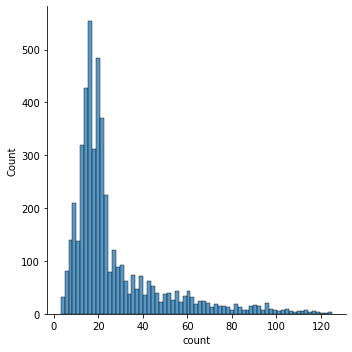

In [50]:
sns.displot(df_w['count'])

In [49]:
df_w.drop(df_w[(df_w['count'] > 125)].index, inplace=True)

C:\Users\CLIENTE\anaconda3\envs\cuda_ambientesu\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
new_df = df_w.copy()

In [52]:
new_df.describe()

,count,count_2
count,4823.000000,4823.000000
mean,26.971180,15.578893
std,20.989031,11.202148
min,3.000000,3.000000
25%,15.000000,9.000000
50%,19.000000,12.000000
75%,30.000000,17.000000
max,125.000000,88.000000


In [53]:
new_df.head(4)

,bias,text,count,text_clean,tokens,count_2
0,partisan,nowthisnews rep trey radel r fl slams obamaca...,9,nowthisnews rep trey radel r fl slams obamac...,"[nowthisnews, rep, trey, radel, r, fl, slams, ...",9
1,partisan,video obamacare full of higher costs and bro...,9,video obamacare higher costs broken promises,"[video, obamacare, higher, costs, broken, prom...",6
2,neutral,please join me today in remembering our fallen...,22,join today remembering fallen heroes honoring ...,"[join, today, remembering, fallen, heroes, hon...",12
3,neutral,senatorleahy 1st step toward senate debate on...,19,senatorleahy 1st step senate debate leahycra...,"[senatorleahy, 1st, step, senate, debate, leah...",14


In [54]:
new_df = new_df.drop(['text_clean', 'count_2', 'tokens'], axis=1)

In [55]:
new_df

,bias,text,count
0,partisan,nowthisnews rep trey radel r fl slams obamaca...,9
1,partisan,video obamacare full of higher costs and bro...,9
2,neutral,please join me today in remembering our fallen...,22
3,neutral,senatorleahy 1st step toward senate debate on...,19
4,partisan,amazon delivery drones show need to update law...,19
...,...,...,...
4994,neutral,i was honored to host the discovery channel in...,64
4995,partisan,i applaud governor perrys recent decision to d...,61
4997,neutral,taken from posted wokv interview congressman...,58
4998,neutral,join me next week for a town hall in ocala ill...,20


In [56]:
encoder = LabelEncoder()

new_df["bias"] = encoder.fit_transform(new_df["bias"])


In [57]:
new_df.head(4)

## 1 PArtisan
## 0 Neutral

,bias,text,count
0,1,nowthisnews rep trey radel r fl slams obamaca...,9
1,1,video obamacare full of higher costs and bro...,9
2,0,please join me today in remembering our fallen...,22
3,0,senatorleahy 1st step toward senate debate on...,19


### Lematizar

In [1]:
## Lematizar es una buena practica en text_classification

In [58]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    #print(words)
    #print(lemmatized_words)
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

new_df['lemmatized_text'] = new_df['text'].apply(lemmatize_text)
## Si lematiza

In [59]:
new_df.head(50)

,bias,text,count,lemmatized_text
0,1,nowthisnews rep trey radel r fl slams obamaca...,9,nowthisnews rep trey radel r fl slam obamacare...
1,1,video obamacare full of higher costs and bro...,9,video obamacare full of higher cost and broken...
2,0,please join me today in remembering our fallen...,22,please join me today in remembering our fallen...
3,0,senatorleahy 1st step toward senate debate on...,19,senatorleahy 1st step toward senate debate on ...
4,1,amazon delivery drones show need to update law...,19,amazon delivery drone show need to update law ...
5,1,called on the usdotfra to release info about i...,18,called on the usdotfra to release info about i...
6,0,bbcworld help us keep the kidnapped nigerian s...,14,bbcworld help u keep the kidnapped nigerian sc...
7,0,show your arizona pridechoose your favorite s ...,19,show your arizona pridechoose your favorite s ...
8,0,what a wonderful night at state senator ken ya...,20,what a wonderful night at state senator ken ya...
9,1,great oped by pres clinton about signing fmla ...,18,great oped by pres clinton about signing fmla ...


In [60]:
## Guardamos el nuevo DF
new_df.to_csv('cleansed_df.csv', index=False)  